# Usage examples for the functions in `Erlang.py`

In [3]:
# Erlang
import Erlang

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Defining general plot style
sns.set_theme()
percent_formater = formater.PercentFormatter(xmax=1, decimals=0)

## M/M/c (Erlang C model)

In [4]:
# Arrival rate (=lambda=1/E[I])
l = 8/60

# Service rate (=mu=1/E[S])
mu = 1/60

# Workload (=lambda/mu)
a = l/mu

# Number of operators
c = 9

### State probabilities

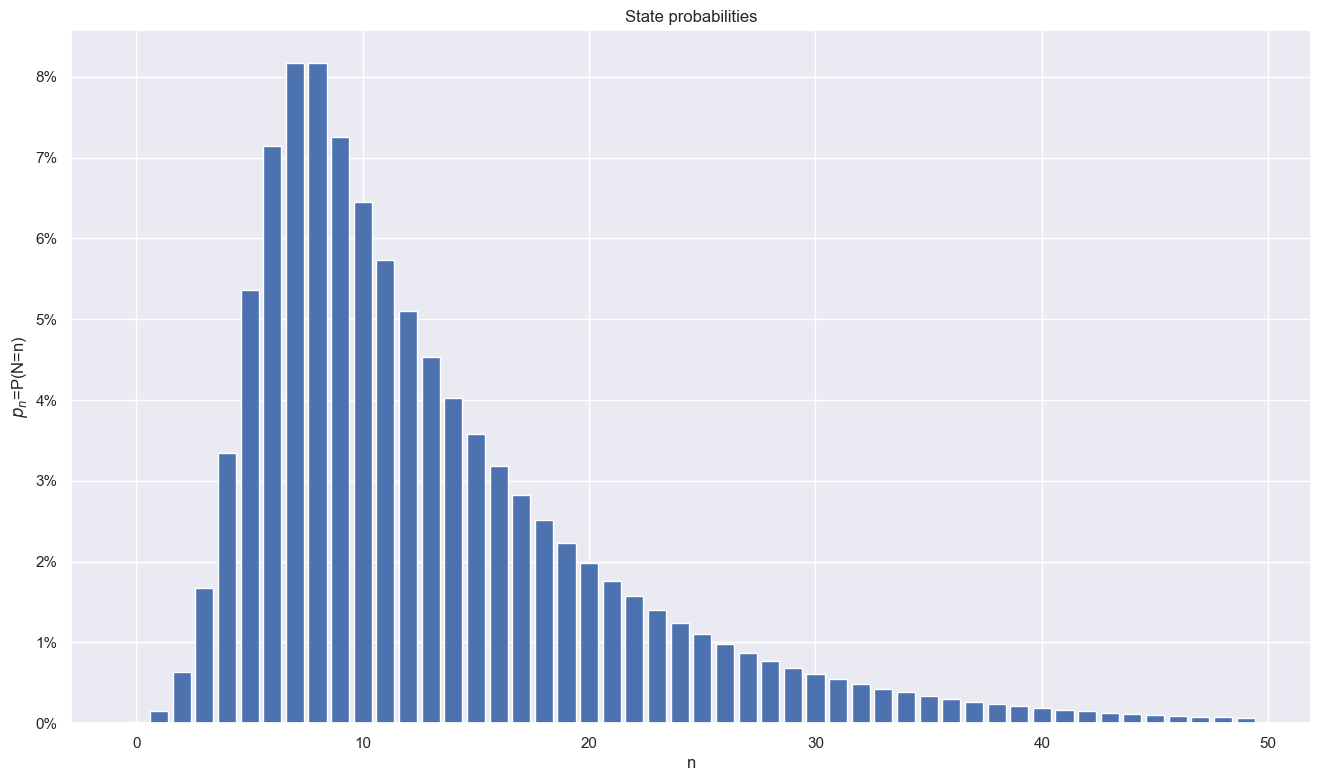

In [5]:
x = range(50)
y = [Erlang.MMcStateP(a, c, n) for n in x]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(x, y)
ax.set_title("State probabilities")
ax.set_xlabel("n")
ax.set_ylabel("$p_n$=P(N=n)")
ax.yaxis.set_major_formatter(percent_formater)

### Waiting time distribution

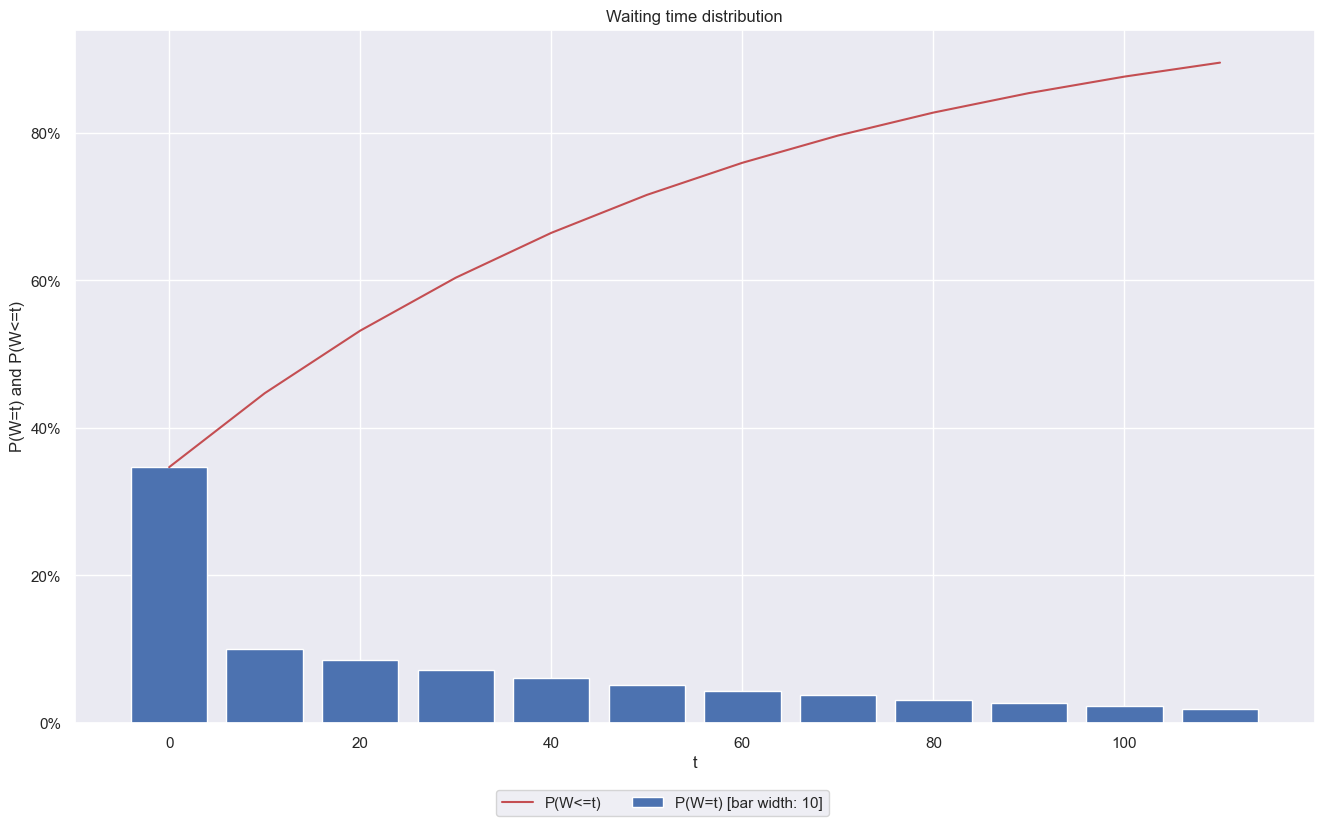

In [6]:
bar_width = 10
x = [bar_width*i for i in range(round(120/bar_width))]
y_cdf = [Erlang.ErlangC(l, mu, c, t) for t in x]
y_pdf = [d[0]-d[1] for d in zip(y_cdf, [0, *y_cdf][0:len(y_cdf)])]

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x, y_cdf, 'r', label="P(W<=t)")
ax.bar(x, y_pdf, label="P(W=t) [bar width: "+str(bar_width)+"]", width=bar_width*0.8)
ax.set_title("Waiting time distribution")
ax.set_xlabel("t")
ax.set_ylabel("P(W=t) and P(W<=t)")
ax.yaxis.set_major_formatter(percent_formater)
fig.legend(loc='lower center', ncol=2)

### Key performance indicators

In [7]:
# KPIs which can be calculated directly
print("Average inter-arrival time E[I]=",
      round(1/l, 1), " (in seconds)", sep="")
print("Average service time E[S]=", round(1/mu/60, 1), " (in minutes)", sep="")
print("Workload a=", round(a, 1), sep="")
print("Utilization for the (c=", c, " operators) rho=", round(a/c*100, 1), "%", sep="")

# KPIs calculated by Erlang C formula
print("Blocking probability P(W>0)=", round(Erlang.ErlangC_P1(a, c)*100, 1), "%", sep="")
print("Average queue length E[NQ]=", round(Erlang.ErlangC_ENQ(l, mu, c), 1), sep="")
print("Average number of customers in the system E[N]=", round(Erlang.ErlangC_EN(l, mu, c), 1), sep="")
print("Average waiting time E[W]=", round(Erlang.ErlangC_EW(l, mu, c), 1), " (in seconds)", sep="")
print("Average residence time E[V]=", round(Erlang.ErlangC_EV(l, mu, c), 1), " (in seconds)", sep="")

Average inter-arrival time E[I]=7.5 (in seconds)
Average service time E[S]=1.0 (in minutes)
Workload a=8.0
Utilization for the (c=9 operators) rho=88.9%
Blocking probability P(W>0)=65.3%
Average queue length E[NQ]=5.2
Average number of customers in the system E[N]=13.2
Average waiting time E[W]=39.2 (in seconds)
Average residence time E[V]=99.2 (in seconds)


### Average waiting time depending on the utilization

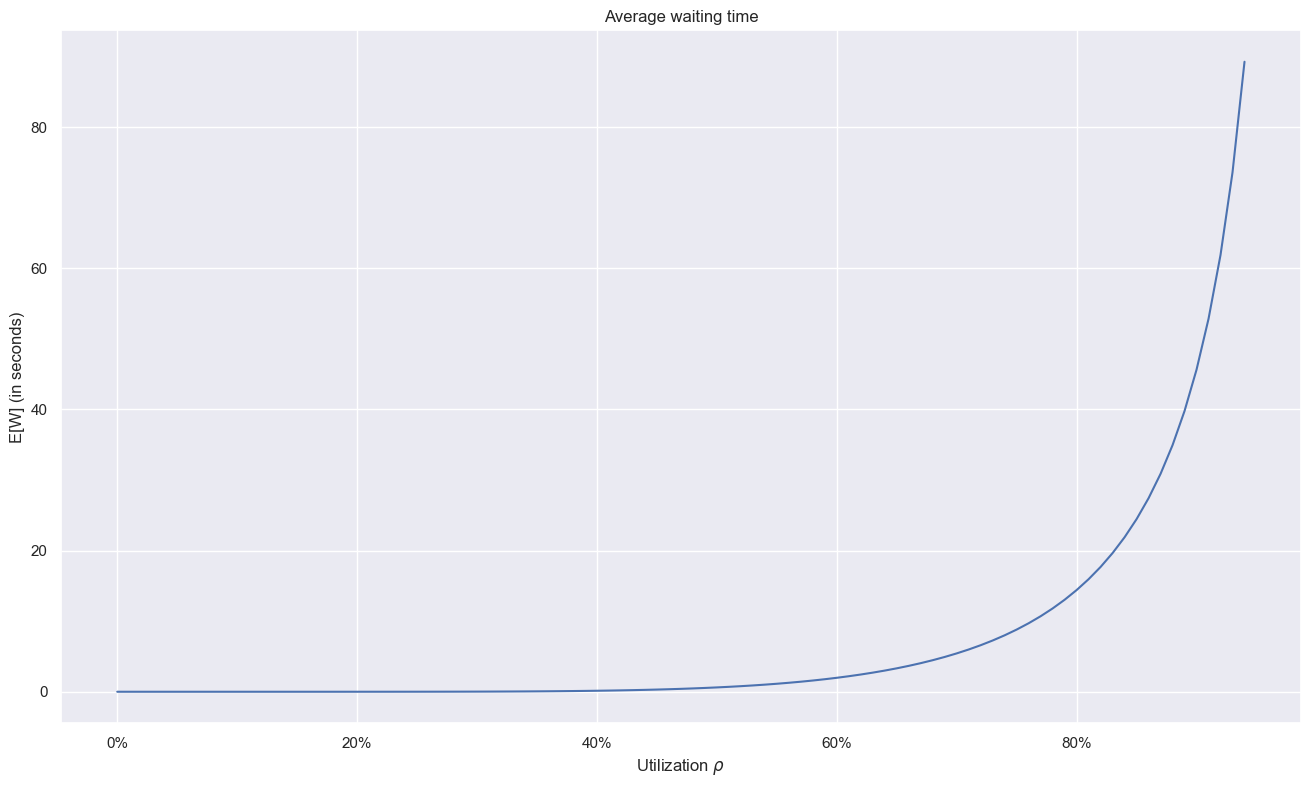

In [8]:
rho_array = [i/100 for i in range(95)]
l_array = [rho*mu*c for rho in rho_array]  # rho=l/mu/c
EW_array = [Erlang.ErlangC_EW(l, mu, c) for l in l_array]

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(rho_array, EW_array)
ax.set_title("Average waiting time")
ax.set_xlabel("Utilization $\\rho$")
ax.set_ylabel("E[W] (in seconds)")
ax.xaxis.set_major_formatter(percent_formater)

## M/M/c/K+M (extended Erlang C model)

In [9]:
# Arrival rate (=lambda=1/E[I])
l = 8/60

# Service rate (=mu=1/E[S])
mu = 1/60

# Cancelation rate (=nu=1/E[WT])
nu = 1/120

# System size (maximum number of customers in the system)
K = 200

# Workload (=lambda/mu)
a = l/mu

# Number of operators
c = 9

### State probabilities

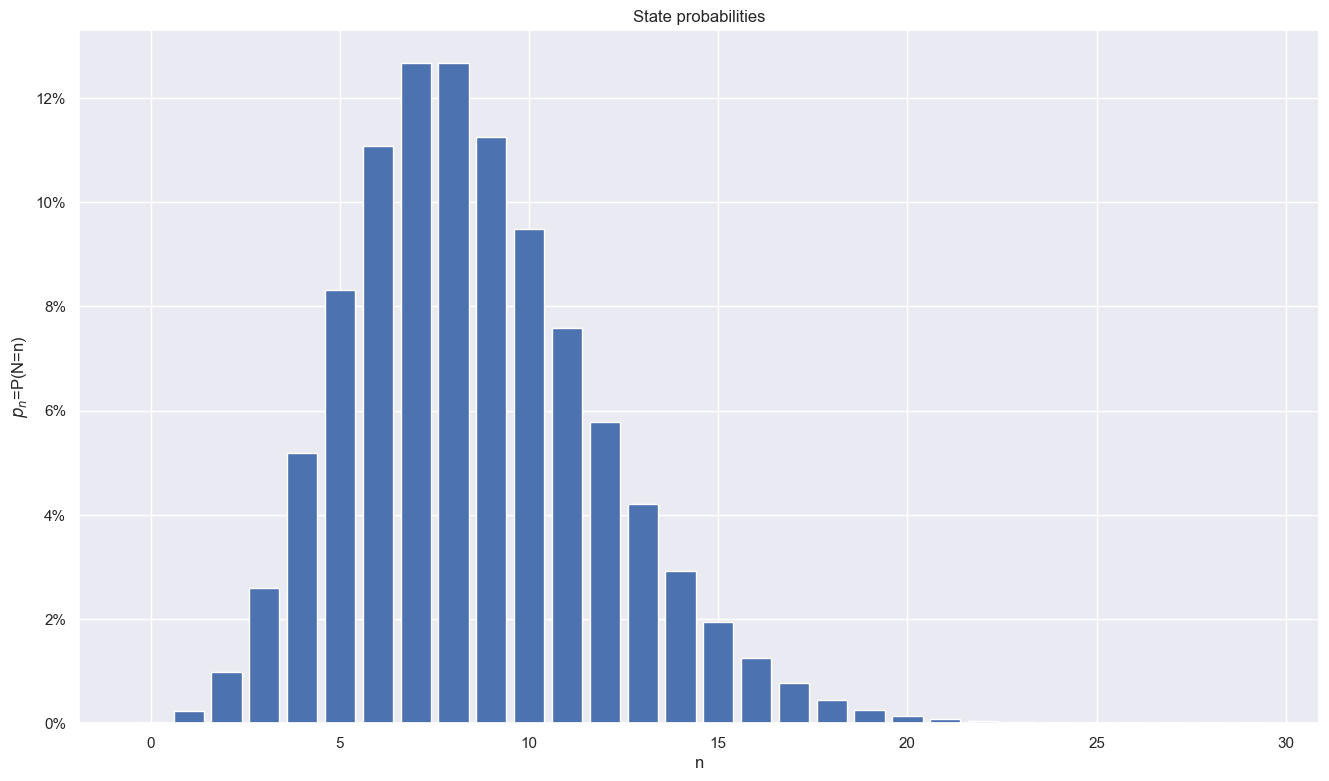

In [10]:
x = range(30)
y = [Erlang.MMcKMStateP(l, mu, nu, c, K, n) for n in x]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(x, y)
ax.set_title("State probabilities")
ax.set_xlabel("n")
ax.set_ylabel("$p_n$=P(N=n)")
ax.yaxis.set_major_formatter(percent_formater)

### Waiting time distribution

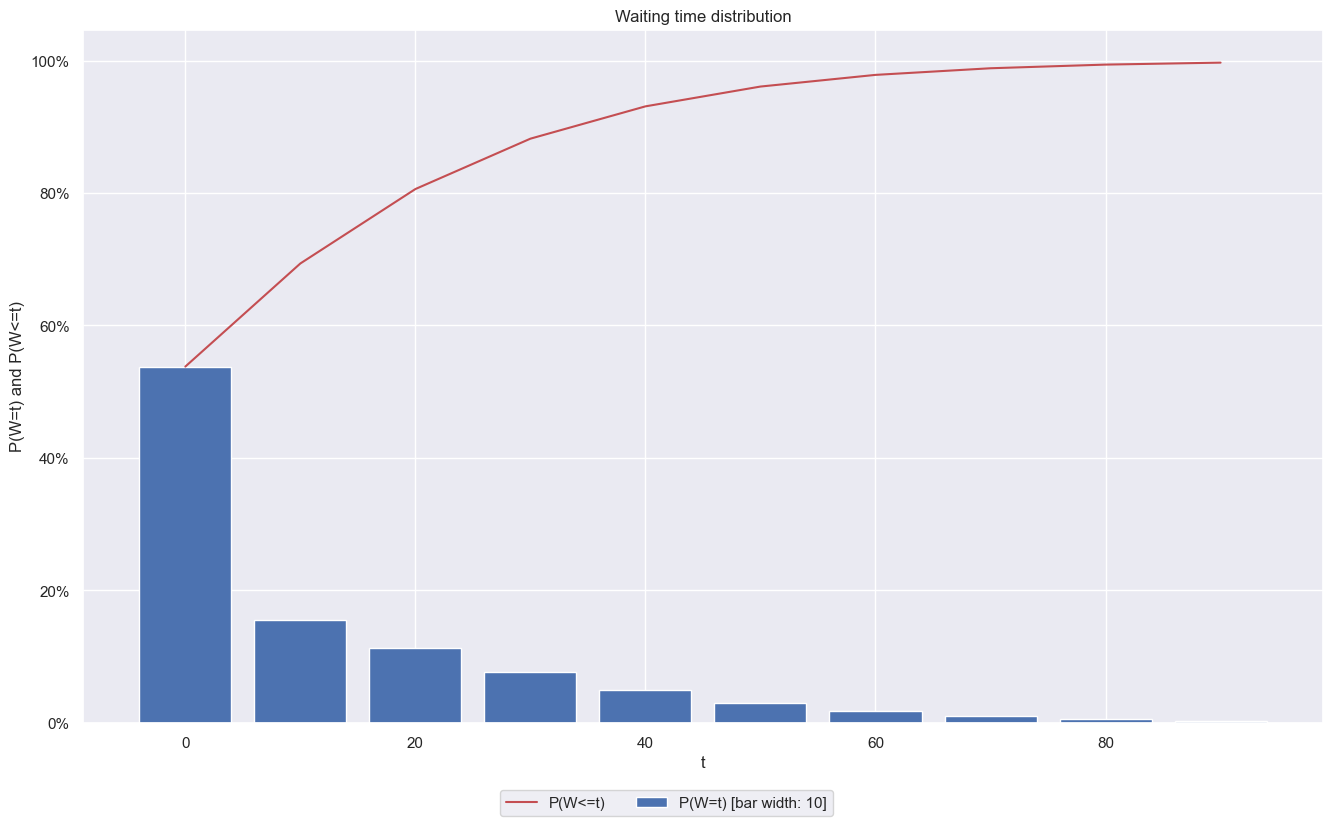

In [11]:
bar_width = 10
x = [bar_width*i for i in range(round(100/bar_width))]
y_cdf = [Erlang.ExtErlangC(l, mu, nu, c, K, t) for t in x]
y_pdf = [d[0]-d[1] for d in zip(y_cdf, [0, *y_cdf][0:len(y_cdf)])]

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x, y_cdf, 'r', label="P(W<=t)")
ax.bar(x, y_pdf, label="P(W=t) [bar width: "+str(bar_width)+"]", width=bar_width*0.8)
ax.set_title("Waiting time distribution")
ax.set_xlabel("t")
ax.set_ylabel("P(W=t) and P(W<=t)")
ax.yaxis.set_major_formatter(percent_formater)
fig.legend(loc='lower center', ncol=2)

### Key performance indicators

In [12]:
# KPIs which can be calculated directly
print("Average inter-arrival time E[I]=", round(1/l, 1), " (in seconds)", sep="")
print("Average service time E[S]=", round(1/mu/60, 1), " (in minutes)", sep="")
print("Average waiting time tolerance E[WT]=", round(1/nu/60, 1), " (in minutes)", sep="")
print("Workload a=", round(a, 1), sep="")
print("Utilization for the (c=", c, " operators) rho=", round(a/c*100, 1), "% (measured at system entry)", sep="")

# KPIs calculated by Erlang C formula
print("Waiting cancelation probability=", round(Erlang.ExtErlangC_PA(l, mu, nu, c, K)*100, 1), "%", sep="")
print("Average queue length E[NQ]=", round(Erlang.ExtErlangC_ENQ(l, mu, nu, c, K), 1), sep="")
print("Average number of customers in the system E[N]=", round(Erlang.ExtErlangC_EN(l, mu, nu, c, K), 1), sep="")
print("Average waiting time E[W]=", round(Erlang.ExtErlangC_EW(l, mu, nu, c, K), 1), " (in seconds)", sep="")
print("Average residence time E[V]=", round(Erlang.ExtErlangC_EV(l, mu, nu, c, K), 1), " (in seconds)", sep="")

Average inter-arrival time E[I]=7.5 (in seconds)
Average service time E[S]=1.0 (in minutes)
Average waiting time tolerance E[WT]=2.0 (in minutes)
Workload a=8.0
Utilization for the (c=9 operators) rho=88.9% (measured at system entry)
Waiting cancelation probability=6.9%
Average queue length E[NQ]=1.1
Average number of customers in the system E[N]=8.6
Average waiting time E[W]=8.3 (in seconds)
Average residence time E[V]=64.1 (in seconds)


### Average waiting time depending on the utilization

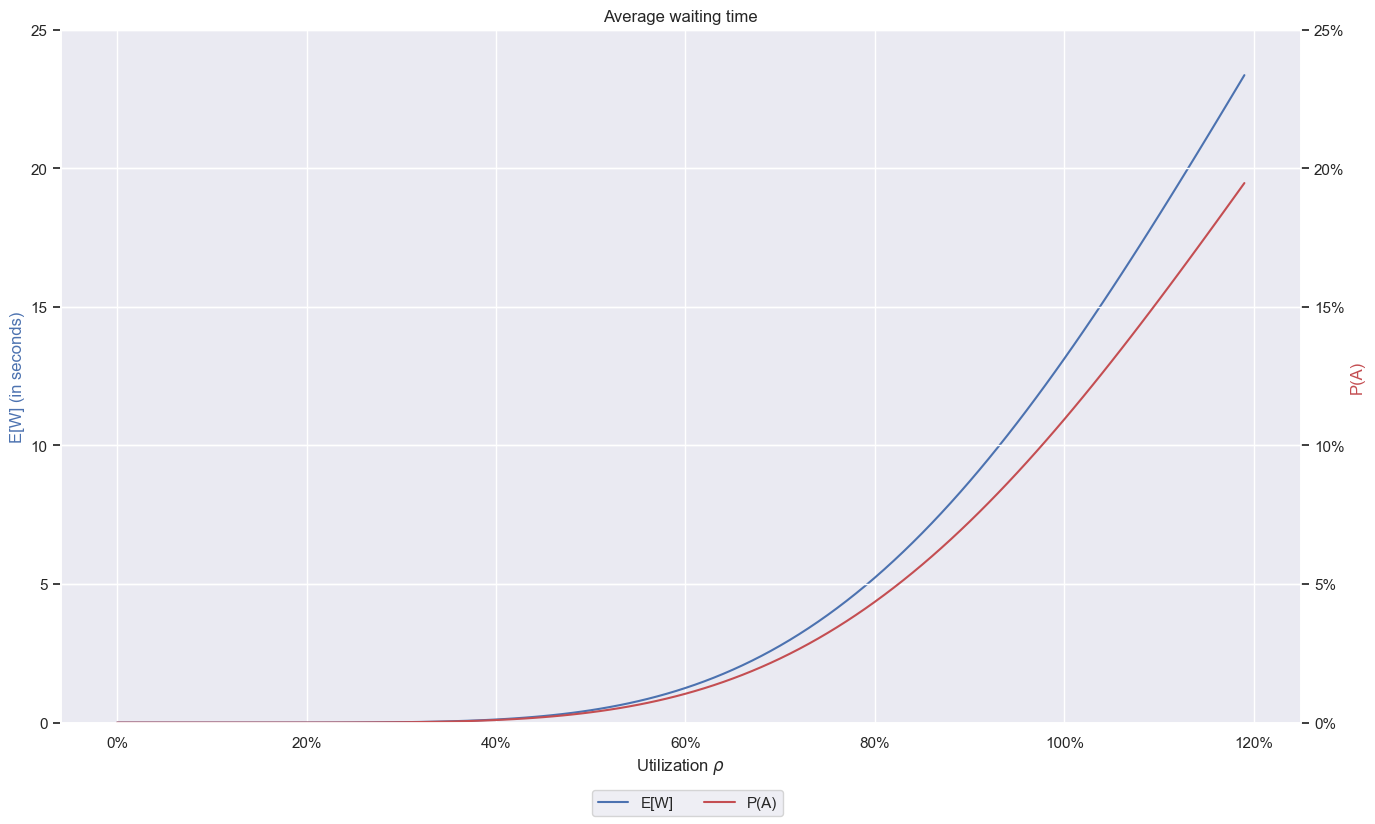

In [13]:
rho_array = [i/100 for i in range(120)]
l_array = [rho*mu*c for rho in rho_array]  # rho=l/mu/c
EW_array = [Erlang.ExtErlangC_EW(l, mu, nu, c, K) for l in l_array]
PA_array = [Erlang.ExtErlangC_PA(l, mu, nu, c, K) for l in l_array]

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(rho_array, EW_array, "b", label="E[W]")
ax.set_title("Average waiting time")
ax.set_xlabel("Utilization $\\rho$")
ax.set_ylabel("E[W] (in seconds)", color="b")
ax.xaxis.set_major_formatter(percent_formater)
ax.set_ylim(0, 25)

ax = ax.twinx()
ax.plot(rho_array, PA_array, 'r', label="P(A)")
ax.set_ylabel("P(A)", color="r")
ax.yaxis.set_major_formatter(percent_formater)
ax.set_ylim(0, 0.25)

fig.legend(loc='lower center', ncol=2)

## M/M/c/c (Erlang B model)

In [14]:
# Workload (=lambda/mu)
a = 7

# Number of operators
c = 9

### Key performance indicators

In [15]:
# KPIs which can be calculated directly
print("Workload a=", round(a, 1), sep="")
print("Utilization for the (c=", c, " operators) rho=", round(a/c*100, 1), "%", sep="")

# KPIs calculated by Erlang B formula
print("Probability for c customers in the system P(N=c)=", round(Erlang.ErlangB(a, c)*100, 1), "%", sep="")

Workload a=7
Utilization for the (c=9 operators) rho=77.8%
Probability for c customers in the system P(N=c)=12.2%
